In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler 

In [4]:
df = pd.read_csv("telco python.csv")

In [5]:
X = df.drop("ChurnFlag", axis=1)
y = df["ChurnFlag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.8140525195173882
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



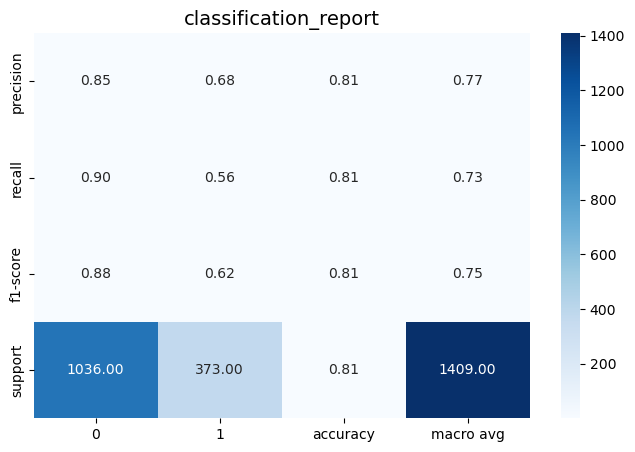

In [9]:

model = LogisticRegression(max_iter=50000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

report_data = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report_data).transpose()

plt.figure(figsize=(8,5))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f")
plt.title("classification_report", fontsize=14)
plt.savefig("reports/Logistic Rgression Classification Report.png", dpi=300, bbox_inches='tight')
plt.show()

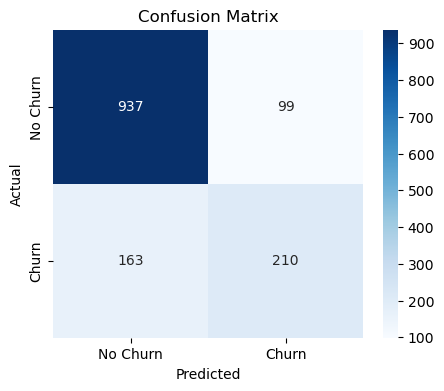

In [48]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("reports/Confusion Matrix.png", dpi=300, bbox_inches='tight')
plt.show()